<a href="https://colab.research.google.com/github/Pavithrajoe/Projects/blob/main/Amazon_Sales_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

# Define the file path
file_path = '/content/drive/My Drive/Data Analytics projects/Amazon Sales Analysis/Amazon 2_Raw.xlsx'

# Load the Excel file into a DataFrame
df = pd.read_excel(file_path)

# Display the first few rows to confirm it's loaded correctly
df.head()


,Order ID,Order Date,Ship Date,EmailID,Geography,Category,Product Name,Sales,Quantity,Profit
0,CA-2013-138688,2013-06-13,2013-06-17,DarrinVanHuff@gmail.com,"United States,Los Angeles,California",Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2,6.8714
1,CA-2011-115812,2011-06-09,2011-06-14,BrosinaHoffman@gmail.com,"United States,Los Angeles,California",Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.860,7,14.1694
2,CA-2011-115812,2011-06-09,2011-06-14,BrosinaHoffman@gmail.com,"United States,Los Angeles,California",Art,Newell 322,7.280,4,1.9656
3,CA-2011-115812,2011-06-09,2011-06-14,BrosinaHoffman@gmail.com,"United States,Los Angeles,California",Phones,Mitel 5320 IP Phone VoIP phone,907.152,4,90.7152
4,CA-2011-115812,2011-06-09,2011-06-14,BrosinaHoffman@gmail.com,"United States,Los Angeles,California",Binders,DXL Angle-View Binders with Locking Rings by S...,18.504,3,5.7825


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3203 entries, 0 to 3202
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order ID      3203 non-null   object        
 1   Order Date    3203 non-null   datetime64[ns]
 2   Ship Date     3203 non-null   datetime64[ns]
 3   EmailID       3203 non-null   object        
 4   Geography     3203 non-null   object        
 5   Category      3203 non-null   object        
 6   Product Name  3203 non-null   object        
 7   Sales         3203 non-null   float64       
 8   Quantity      3203 non-null   int64         
 9   Profit        3203 non-null   float64       
dtypes: datetime64[ns](2), float64(2), int64(1), object(5)
memory usage: 250.4+ KB


In [ ]:
df.describe()

,Order Date,Ship Date,Sales,Quantity,Profit
count,3203,3203,3203.000000,3203.000000,3203.000000
mean,2013-05-10 03:06:07.530440192,2013-05-14 01:25:25.195129600,226.493233,3.828910,33.849032
min,2011-01-07 00:00:00,2011-01-09 00:00:00,0.990000,1.000000,-3399.980000
25%,2012-05-22 00:00:00,2012-05-26 00:00:00,19.440000,2.000000,3.852000
50%,2013-07-22 00:00:00,2013-07-25 00:00:00,60.840000,3.000000,11.166400
75%,2014-05-23 00:00:00,2014-05-27 00:00:00,215.809000,5.000000,33.000400
max,2014-12-31 00:00:00,2015-01-06 00:00:00,13999.960000,14.000000,6719.980800
std,NaN,NaN,524.876877,2.260947,174.109081


***Data Cleaning and Preparation***

In [ ]:
df['Order Date'] = pd.to_datetime(df['Order Date']) # A Pandas function that converts a given input into a 'datetime' object.It converts various date formats into a consistent 'datetime' format
df.head()

,Order ID,Order Date,Ship Date,EmailID,Geography,Category,Product Name,Sales,Quantity,Profit
0,CA-2013-138688,2013-06-13,2013-06-17,DarrinVanHuff@gmail.com,"United States,Los Angeles,California",Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2,6.8714
1,CA-2011-115812,2011-06-09,2011-06-14,BrosinaHoffman@gmail.com,"United States,Los Angeles,California",Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.860,7,14.1694
2,CA-2011-115812,2011-06-09,2011-06-14,BrosinaHoffman@gmail.com,"United States,Los Angeles,California",Art,Newell 322,7.280,4,1.9656
3,CA-2011-115812,2011-06-09,2011-06-14,BrosinaHoffman@gmail.com,"United States,Los Angeles,California",Phones,Mitel 5320 IP Phone VoIP phone,907.152,4,90.7152
4,CA-2011-115812,2011-06-09,2011-06-14,BrosinaHoffman@gmail.com,"United States,Los Angeles,California",Binders,DXL Angle-View Binders with Locking Rings by S...,18.504,3,5.7825


In [ ]:
df['YearMonth'] = df['Order Date'].dt.to_period('M') # dt.to_period('M') means datetime(dt) converts to period of month for easy predicting
df.head()

,Order ID,Order Date,Ship Date,EmailID,Geography,Category,Product Name,Sales,Quantity,Profit,YearMonth
0,CA-2013-138688,2013-06-13,2013-06-17,DarrinVanHuff@gmail.com,"United States,Los Angeles,California",Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2,6.8714,2013-06
1,CA-2011-115812,2011-06-09,2011-06-14,BrosinaHoffman@gmail.com,"United States,Los Angeles,California",Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.860,7,14.1694,2011-06
2,CA-2011-115812,2011-06-09,2011-06-14,BrosinaHoffman@gmail.com,"United States,Los Angeles,California",Art,Newell 322,7.280,4,1.9656,2011-06
3,CA-2011-115812,2011-06-09,2011-06-14,BrosinaHoffman@gmail.com,"United States,Los Angeles,California",Phones,Mitel 5320 IP Phone VoIP phone,907.152,4,90.7152,2011-06
4,CA-2011-115812,2011-06-09,2011-06-14,BrosinaHoffman@gmail.com,"United States,Los Angeles,California",Binders,DXL Angle-View Binders with Locking Rings by S...,18.504,3,5.7825,2011-06


In [ ]:
df.dropna(inplace=True)  # Example: dropping rows with missing values
df.head()


,Order ID,Order Date,Ship Date,EmailID,Geography,Category,Product Name,Sales,Quantity,Profit,YearMonth
0,CA-2013-138688,2013-06-13,2013-06-17,DarrinVanHuff@gmail.com,"United States,Los Angeles,California",Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2,6.8714,2013-06
1,CA-2011-115812,2011-06-09,2011-06-14,BrosinaHoffman@gmail.com,"United States,Los Angeles,California",Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.860,7,14.1694,2011-06
2,CA-2011-115812,2011-06-09,2011-06-14,BrosinaHoffman@gmail.com,"United States,Los Angeles,California",Art,Newell 322,7.280,4,1.9656,2011-06
3,CA-2011-115812,2011-06-09,2011-06-14,BrosinaHoffman@gmail.com,"United States,Los Angeles,California",Phones,Mitel 5320 IP Phone VoIP phone,907.152,4,90.7152,2011-06
4,CA-2011-115812,2011-06-09,2011-06-14,BrosinaHoffman@gmail.com,"United States,Los Angeles,California",Binders,DXL Angle-View Binders with Locking Rings by S...,18.504,3,5.7825,2011-06


In [ ]:
df.dtypes
df.head()

,Order ID,Order Date,Ship Date,EmailID,Geography,Category,Product Name,Sales,Quantity,Profit,YearMonth
0,CA-2013-138688,2013-06-13,2013-06-17,DarrinVanHuff@gmail.com,"United States,Los Angeles,California",Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2,6.8714,2013-06
1,CA-2011-115812,2011-06-09,2011-06-14,BrosinaHoffman@gmail.com,"United States,Los Angeles,California",Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.860,7,14.1694,2011-06
2,CA-2011-115812,2011-06-09,2011-06-14,BrosinaHoffman@gmail.com,"United States,Los Angeles,California",Art,Newell 322,7.280,4,1.9656,2011-06
3,CA-2011-115812,2011-06-09,2011-06-14,BrosinaHoffman@gmail.com,"United States,Los Angeles,California",Phones,Mitel 5320 IP Phone VoIP phone,907.152,4,90.7152,2011-06
4,CA-2011-115812,2011-06-09,2011-06-14,BrosinaHoffman@gmail.com,"United States,Los Angeles,California",Binders,DXL Angle-View Binders with Locking Rings by S...,18.504,3,5.7825,2011-06


In [ ]:
df.describe()


,Order Date,Ship Date,Sales,Quantity,Profit
count,3203,3203,3203.000000,3203.000000,3203.000000
mean,2013-05-10 03:06:07.530440192,2013-05-14 01:25:25.195129600,226.493233,3.828910,33.849032
min,2011-01-07 00:00:00,2011-01-09 00:00:00,0.990000,1.000000,-3399.980000
25%,2012-05-22 00:00:00,2012-05-26 00:00:00,19.440000,2.000000,3.852000
50%,2013-07-22 00:00:00,2013-07-25 00:00:00,60.840000,3.000000,11.166400
75%,2014-05-23 00:00:00,2014-05-27 00:00:00,215.809000,5.000000,33.000400
max,2014-12-31 00:00:00,2015-01-06 00:00:00,13999.960000,14.000000,6719.980800
std,NaN,NaN,524.876877,2.260947,174.109081


***Line Graph of Monthly Sales Trends***

In [ ]:
# Group by 'YearMonth' and sum 'Sales'
monthly_sales = df.groupby('YearMonth')['Sales'].sum().reset_index()

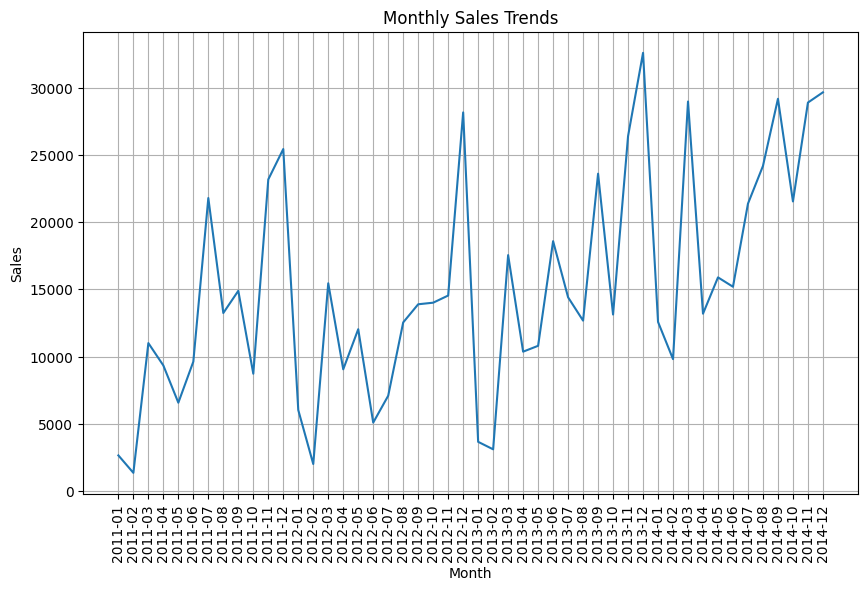

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(monthly_sales['YearMonth'].astype(str), monthly_sales['Sales'])
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()


***Bar Chart of Top 10 Products by Sales***

In [ ]:
# Group by 'Product Name' and sum 'Sales'
product_sales = df.groupby('Product Name')['Sales'].sum().reset_index()

# Sort and select top 10 products
top_products = product_sales.sort_values(by='Sales', ascending=False).head(10)


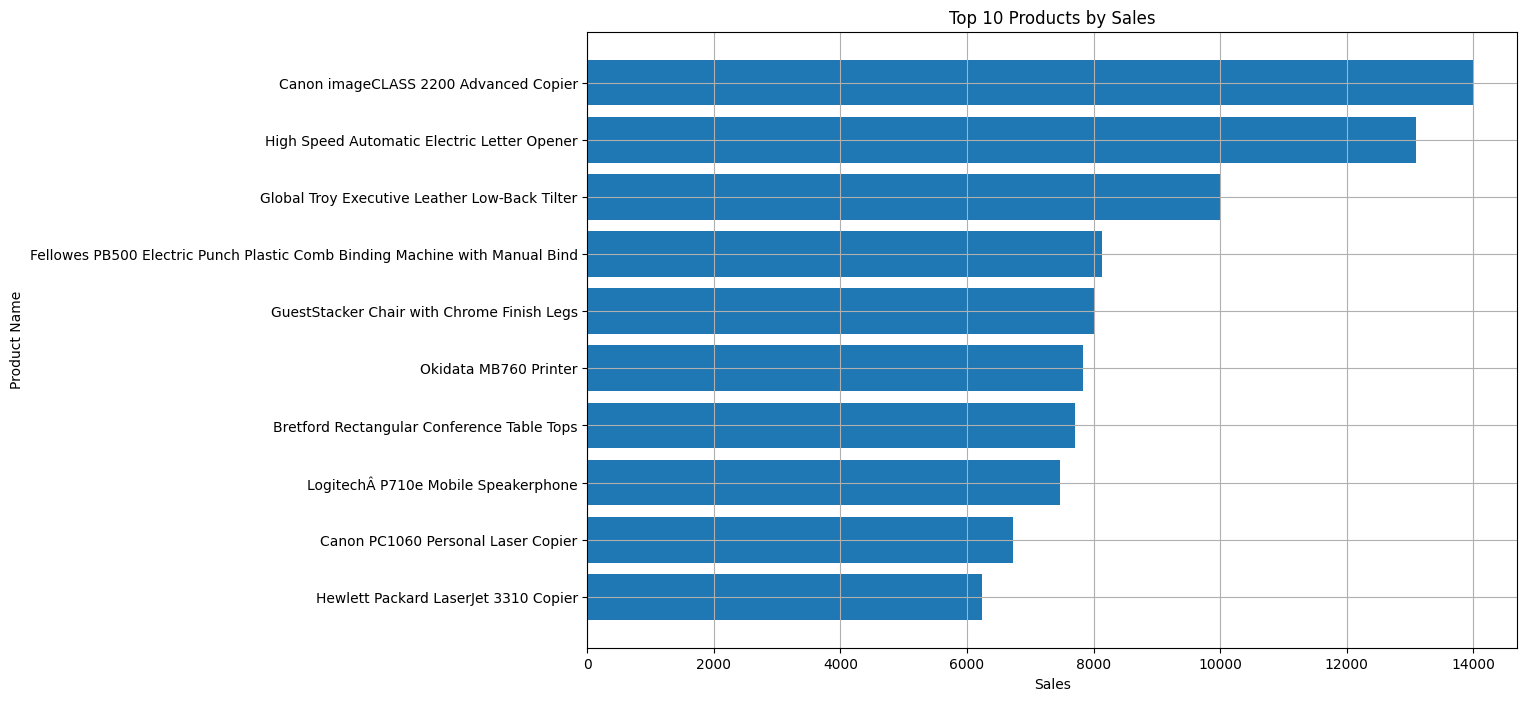

In [ ]:
plt.figure(figsize=(12, 8))
plt.barh(top_products['Product Name'], top_products['Sales'])
plt.title('Top 10 Products by Sales')
plt.xlabel('Sales')
plt.ylabel('Product Name')
plt.gca().invert_yaxis()  # Reverse the order for better readability
plt.grid(True)
plt.show()


***Pie Chart of Sales by Region***

In [ ]:
# Group by 'Geography' and sum 'Sales'
region_sales = df.groupby('Geography')['Sales'].sum().reset_index()


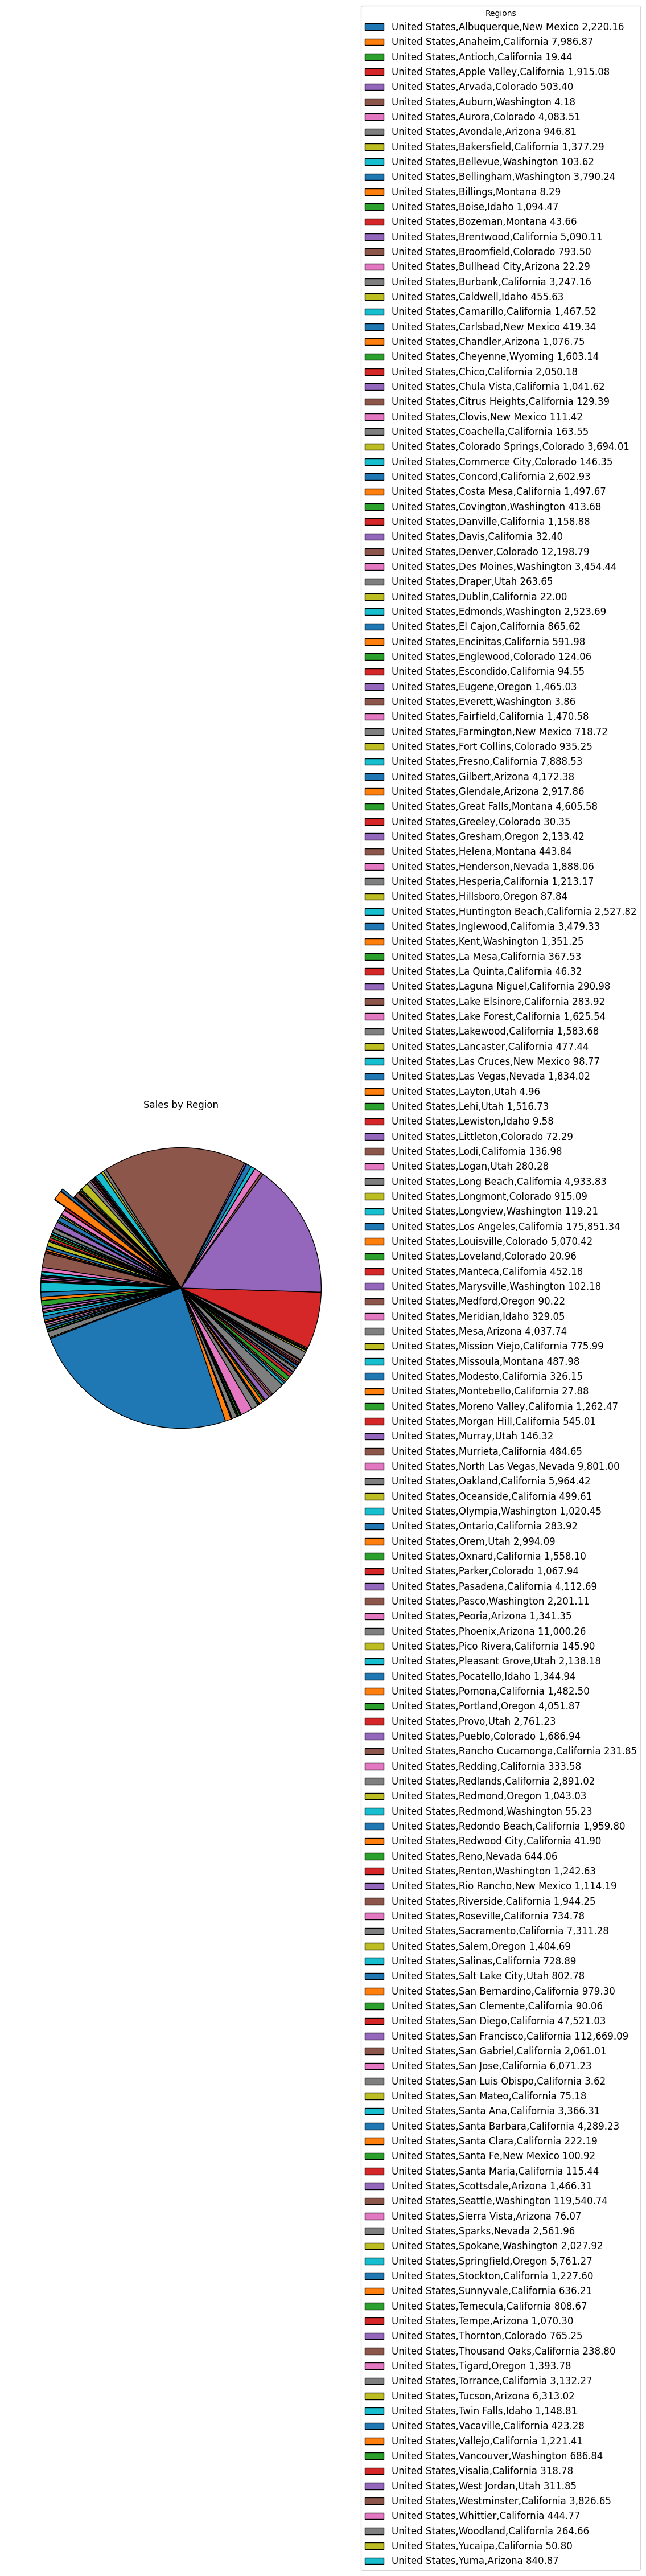

In [ ]:
import matplotlib.pyplot as plt

# Define explode values to highlight key slices (e.g., the top 3 regions)
explode = [0.1 if i < 3 else 0 for i in range(len(region_sales))]

# Increase figure size and improve readability
plt.figure(figsize=(14, 8))

# Pie chart without labels and percentages on the chart
wedges, texts = plt.pie(region_sales['Sales'],
                       startangle=140,
                       explode=explode,
                       wedgeprops={'edgecolor': 'black'})

# Create legend with colors matching the pie chart
plt.legend(wedges,
           [f'{region} {sales:,.2f}' for region, sales in zip(region_sales['Geography'], region_sales['Sales'])],
           title="Regions",
           loc="center left",
           bbox_to_anchor=(1, 0, 0.5, 1),
           fontsize=12)

plt.title('Sales by Region')

# Display the pie chart
plt.show()


***Heatmap of Sales by Month and Region***

In [ ]:
# Pivot table to create a matrix of sales by month and region
heatmap_data = df.pivot_table(values='Sales', index='YearMonth', columns='Geography', aggfunc='sum').fillna(0)


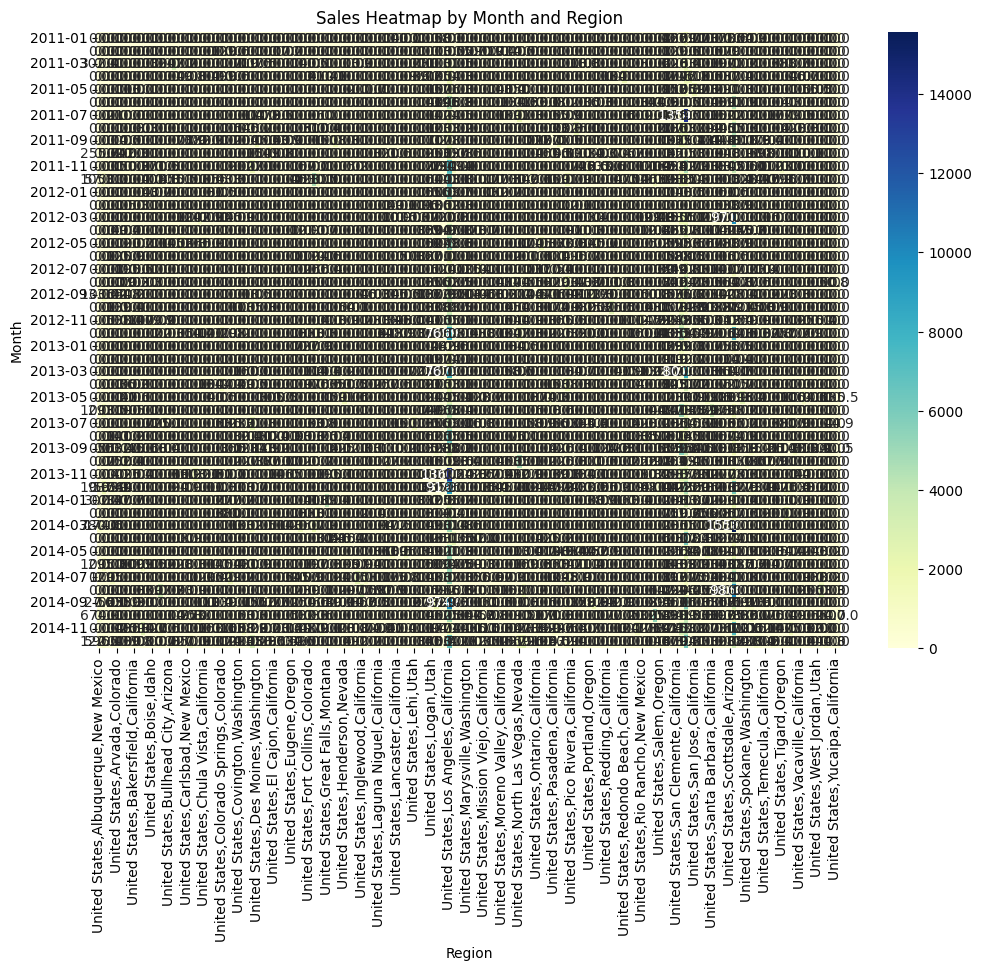

In [ ]:
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='.1f')
plt.title('Sales Heatmap by Month and Region')
plt.xlabel('Region')
plt.ylabel('Month')
plt.show()
